In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
depth_df = pd.read_csv('depths.csv')

In [3]:
depth_df.describe()

,z
count,22000.000000
mean,506.453318
std,208.605991
min,50.000000
25%,352.000000
50%,513.000000
75%,671.000000
max,959.000000


In [4]:
depth_df.head()

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


In [5]:
depths = depth_df.z.values
unique_depths, counts = np.unique(depths, return_counts=True)

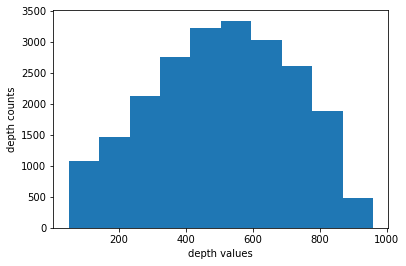

In [6]:
plt.hist(depths)
plt.xlabel('depth values')
plt.ylabel('depth counts')
plt.show()

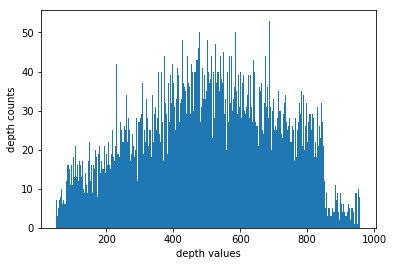

In [7]:
plt.hist(depths, bins=unique_depths)
plt.xlabel('depth values')
plt.ylabel('depth counts')
plt.show()

In [43]:
op = list((unique_depths[1:] - unique_depths[:-1] - 1) == 1)
unique_depths[op.index(True)+1]

909

In [8]:
len(unique_depths)

909

In [9]:
import keras

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
from keras.applications import vgg16

In [11]:
model = vgg16.VGG16()

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [13]:
from keras.layers import Input, Lambda

In [14]:
i = Input((128, 128, 1))
s = Lambda(lambda x: x/255)(i)

In [15]:
from tgs_nets.u_net import build_u_net_normal

In [16]:
outputs = build_u_net_normal(s)

In [17]:
from keras.models import Model
model = Model(inputs=[i], outputs=[outputs])

In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  80          lambda_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [19]:
from tgs_nets.u_net import build_u_net_vgg

In [20]:
outputs_vgg = build_u_net_vgg(s)

In [21]:
model = Model(inputs=[i], outputs=outputs_vgg)

In [22]:
outputs_vgg

[<tf.Tensor 'conv2d_38/Sigmoid:0' shape=(?, 128, 128, 1) dtype=float32>,
 <tf.Tensor 'dense_3/Softmax:0' shape=(?, 4096) dtype=float32>]

In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 8)  80          lambda_1[0][0]                   
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 128, 128, 8)  584         conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_poolin